In [3]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [4]:
df = pd.read_excel("cleaned_flight_price.xlsx")

In [5]:
df

,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min,Total_Duration_Minutes,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,2019,1,10,22,20,170,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,13,15,5,50,445,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,2019,4,25,9,25,1140,...,0,1,0,0,0,1,0,0,0,0
3,3,6218,12,5,2019,23,30,18,5,325,...,0,0,1,0,1,0,0,0,0,0
4,3,13302,1,3,2019,21,35,16,50,285,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,4107,9,4,2019,22,25,19,55,150,...,0,0,1,0,1,0,0,0,0,0
10679,4,4145,27,4,2019,23,20,20,45,155,...,0,0,1,0,1,0,0,0,0,0
10680,4,7229,27,4,2019,11,20,8,20,180,...,0,0,0,0,0,0,1,0,0,0
10681,4,12648,1,3,2019,14,10,11,30,160,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10683 non-null  int64
 1   Price                                      10683 non-null  int64
 2   Journey_Day                                10683 non-null  int64
 3   Journey_Month                              10683 non-null  int64
 4   Journey_Year                               10683 non-null  int64
 5   Arrival_hour                               10683 non-null  int64
 6   Arrival_min                                10683 non-null  int64
 7   Departure_hour                             10683 non-null  int64
 8   Departure_min                              10683 non-null  int64
 9   Total_Duration_Minutes                     10683 non-null  int64
 10  Airline_Air Asia                           106

In [7]:
# Separate features and target

X = df.drop('Price', axis=1)
y = df['Price']

In [8]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Initialize XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [11]:
# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [12]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Root Mean Squared Error: 1760.13
R^2 Score: 0.85


c:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


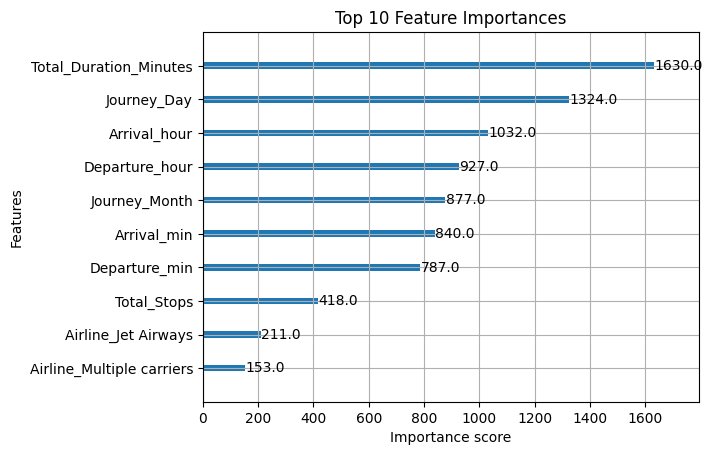

In [13]:
import matplotlib.pyplot as plt

xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

In [14]:
from sklearn.model_selection import KFold, cross_validate
# Cross-validation 
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'R2': 'r2',
    'RMSE': 'neg_root_mean_squared_error'
}

cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)

r2_scores  = cv_results['test_R2']
rmse_scores = -cv_results['test_RMSE']  # negate to get positive RMSE

print(f"R² scores: {r2_scores.round(3)}")
print(f"Mean R²: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print(f"RMSE scores: {rmse_scores.round(2)}")
print(f"Mean RMSE: {rmse_scores.mean():.2f} ± {rmse_scores.std():.2f}")

R² scores: [0.853 0.864 0.844 0.83  0.838]
Mean R²: 0.846 ± 0.012
RMSE scores: [1765.3  1589.49 1874.41 2018.22 1797.05]
Mean RMSE: 1808.89 ± 140.21


In [15]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# 1) Define parameter distributions
param_dist = {
    'n_estimators':       randint(100, 500),
    'learning_rate':      uniform(0.01, 0.3),
    'max_depth':          randint(3, 10),
    'subsample':          uniform(0.5, 0.5),
    'colsample_bytree':   uniform(0.5, 0.5),
    'min_child_weight':   randint(1, 10),
    'gamma':              uniform(0, 5),
    'reg_alpha':          uniform(0, 1),
    'reg_lambda':         uniform(0, 1),
}

# 2) Base regressor
xgb_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

# 3) Randomized search (50 parameter settings, 5-fold CV)
rand_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_dist,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42
)

# 4) Run search on all data
rand_search.fit(X, y)

print("Best R²:", rand_search.best_score_.round(4))
print("Best parameters:")
for k, v in rand_search.best_params_.items():
    print(f"  {k}: {v}")

# 5) Retrieve best model and evaluate with cross-val again
best_model = rand_search.best_estimator_

from sklearn.model_selection import cross_validate
scoring = {
    'R2': 'r2',
    'RMSE': 'neg_root_mean_squared_error'
}
cv_results = cross_validate(best_model, X, y, cv=5, scoring=scoring)

r2s  = cv_results['test_R2']
rmses = -cv_results['test_RMSE']
print(f"Post-tuning mean R²: {r2s.mean():.4f} ± {r2s.std():.4f}")
print(f"Post-tuning mean RMSE: {rmses.mean():.2f} ± {rmses.std():.2f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.6872700594236812, gamma=4.75357153204958, learning_rate=0.22959818254342154, max_depth=7, min_child_weight=5, n_estimators=202, reg_alpha=0.44583275285359114, reg_lambda=0.09997491581800289, subsample=0.7296244459829335; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, gamma=4.75357153204958, learning_rate=0.22959818254342154, max_depth=7, min_child_weight=5, n_estimators=202, reg_alpha=0.44583275285359114, reg_lambda=0.09997491581800289, subsample=0.7296244459829335; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, gamma=4.75357153204958, learning_rate=0.22959818254342154, max_depth=7, min_child_weight=5, n_estimators=202, reg_alpha=0.44583275285359114, reg_lambda=0.09997491581800289, subsample=0.7296244459829335; total time=   0.1s
[CV] END colsample_bytree=0.6872700594236812, gamma=4.75357153204958, learning_rate=0.22959818254342154, max_depth=7, min_child_weight

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Split off a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)

# 3) Use your tuned hyperparameters directly here:
params = {
    'objective':         'reg:squarederror',
    'learning_rate':     0.03824709648056803,
    'max_depth':         8,
    'subsample':         0.9034564885253897,
    'colsample_bytree':  0.6709398333582008,
    'min_child_weight':  4,
    'gamma':             0.4589953290672094,
    'reg_alpha':         0.017161101831750236,
    'reg_lambda':        0.7633644230039109,
    'eval_metric':       'rmse',
    'seed':              42,
}

# 4) Train with early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=10
)

# 5) Evaluate on the validation split
y_pred = bst.predict(dval)
print("Validation RMSE:", mean_squared_error(y_val, y_pred, squared=False))
print("Validation R²:  ", r2_score(y_val, y_pred))

[0]	train-rmse:4496.09943	eval-rmse:4480.72794


[10]	train-rmse:3495.00650	eval-rmse:3541.65941
[20]	train-rmse:2864.19726	eval-rmse:2954.04845
[30]	train-rmse:2439.32637	eval-rmse:2562.92568
[40]	train-rmse:2145.16396	eval-rmse:2313.84372
[50]	train-rmse:1961.32985	eval-rmse:2160.48602
[60]	train-rmse:1840.82393	eval-rmse:2067.95106
[70]	train-rmse:1740.88271	eval-rmse:1989.15454
[80]	train-rmse:1669.82829	eval-rmse:1941.75286
[90]	train-rmse:1620.21753	eval-rmse:1905.16144
[100]	train-rmse:1573.89453	eval-rmse:1873.59251
[110]	train-rmse:1534.91141	eval-rmse:1848.42328
[120]	train-rmse:1501.92000	eval-rmse:1831.75574
[130]	train-rmse:1473.97597	eval-rmse:1816.16801
[140]	train-rmse:1445.57365	eval-rmse:1805.88162
[150]	train-rmse:1423.03979	eval-rmse:1798.54725
[160]	train-rmse:1398.92879	eval-rmse:1788.61013
[170]	train-rmse:1377.85161	eval-rmse:1784.91162
[180]	train-rmse:1356.92171	eval-rmse:1779.13324
[190]	train-rmse:1334.13684	eval-rmse:1772.77546
[200]	train-rmse:1316.16729	eval-rmse:1767.66141
[210]	train-rmse:1297.79599	e

c:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import xgboost as xgb
print(xgb.__version__)

3.0.2


In [18]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Remove outliers from df using the IQR rule on Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

df_clean = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)].copy()
print(f"Removed {len(df) - len(df_clean)} rows; remaining {len(df_clean)} rows.")

# 2) Prepare features & target
X_clean = df_clean.drop('Price', axis=1)
y_clean = df_clean['Price']

# 3) Train/test split on clean data
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

# 4) Recreate & train your XGBoost regressor (use your tuned params)
best_params = {
    'n_estimators':       303,
    'learning_rate':      0.03824709648056803,
    'max_depth':          8,
    'subsample':          0.9034564885253897,
    'colsample_bytree':   0.6709398333582008,
    'min_child_weight':   4,
    'gamma':              0.4589953290672094,
    'reg_alpha':          0.017161101831750236,
    'reg_lambda':         0.7633644230039109,
    'objective':          'reg:squarederror',
    'random_state':       42,
    # skip eval_metric here since we’ll just do a straight fit
}

model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

# 5) Evaluate on the held-out test set
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

print(f"Cleaned-data RMSE: {rmse:.2f}")
print(f"Cleaned-data R²:   {r2:.4f}")


Removed 94 rows; remaining 10589 rows.
Cleaned-data RMSE: 1560.18
Cleaned-data R²:   0.8493


c:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Start from your cleaned DataFrame
df_feat = df_clean.copy()

# 2) Create a proper datetime, then extract day-of-week & weekend flag
df_feat['Journey_Date'] = pd.to_datetime(dict(
    year = df_feat.Journey_Year,
    month= df_feat.Journey_Month,
    day  = df_feat.Journey_Day
))
df_feat['day_of_week'] = df_feat['Journey_Date'].dt.dayofweek        # 0=Mon … 6=Sun
df_feat['is_weekend']   = (df_feat['day_of_week'] >= 5).astype(int)  # 1 if Sat/Sun

# 3) Interaction: stops × duration
df_feat['Stops_Duration'] = df_feat['Total_Stops'] * df_feat['Total_Duration_Minutes']

# 4) Duration bins (short/medium/long)
bins   = [0, 120, 300, np.inf]  
labels = ['short','medium','long']
df_feat['dur_bin'] = pd.cut(df_feat['Total_Duration_Minutes'], bins=bins, labels=labels)
# one-hot encode the bins
df_feat = pd.get_dummies(df_feat, columns=['dur_bin'], drop_first=True)

# 5) Drop temporary columns we don’t need
df_feat.drop(columns=['Journey_Date','day_of_week'], inplace=True)

# 6) Split out X & y
X = df_feat.drop('Price', axis=1)
y = df_feat['Price']

# 7) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8) Refit XGB with your tuned params
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

# 9) Evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

print(f"With new features → RMSE: {rmse:.2f},  R²: {r2:.4f}")


With new features → RMSE: 1573.57,  R²: 0.8467


c:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# 1) Split on the cleaned+engineered DataFrame
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) Log‐transform the target
y_train_log = np.log1p(y_train)

# 3) Fit your XGB on log‐prices
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train_log)

# 4) Predict & invert the transform
y_pred_log = model.predict(X_test)
y_pred      = np.expm1(y_pred_log)

# 5) Evaluate on the original scale
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)
print(f"Log‐target RMSE: {rmse:.2f},  R²: {r2:.4f}")


Log‐target RMSE: 1785.13,  R²: 0.8027


c:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMRegressor(**{
    'n_estimators': 300,
    'learning_rate': 0.05,
    'max_depth': 8,
    'subsample': 0.9,
    'colsample_bytree': 0.7,
    'random_state': 42
})
lgb_model.fit(X_train, y_train)
print("LGB RMSE:",    mean_squared_error(y_test,  lgb_model.predict(X_test), squared=False))
print("LGB R²:",      r2_score(y_test,          lgb_model.predict(X_test)))


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 10.9 MB/s eta 0:00:00
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 8471, number of used features: 31
[LightGBM] [Info] Start training from score 8911.223822
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LGB RMSE: 1573.0695159942647
LGB R²: 0.846804706671489


c:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1) Prepare your features & target (could be df_clean or df_feat from earlier)
X = df_feat.drop('Price', axis=1)   # or df_clean if you haven't done the extra features
y = df_feat['Price']

# 2) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3) Base learners with your best params
xgb_model = xgb.XGBRegressor(**best_params)
lgb_model = lgb.LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.9,
    colsample_bytree=0.7,
    random_state=42
)

# 4) Build the stacking regressor
stack = StackingRegressor(
    estimators=[('xgb', xgb_model), ('lgb', lgb_model)],
    final_estimator=RidgeCV(),  # simple linear blend of the two
    cv=5,
    n_jobs=-1,
    passthrough=True            # also feed original features to the meta-learner
)

# 5) Fit & evaluate
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2   = r2_score(y_test, y_pred)

print(f"Stacked RMSE: {rmse:.2f}")
print(f"Stacked R²:   {r2:.4f}")


Stacked RMSE: 1547.89
Stacked R²:   0.8517


c:\Users\Ivan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
